In [65]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

PATH = "data/insulin/IT 30 ENG/Insulin data/bolus_data_1.csv"

In [74]:
data = pd.read_csv(PATH, header=1)
df = data[["Timestamp", "Carbs Input (g)", "Insulin Delivered (U)"]]
data.head()

,Timestamp,Insulin Type,Blood Glucose Input (mmol/l),Carbs Input (g),Carbs Ratio,Insulin Delivered (U),Initial Delivery (U),Extended Delivery (U),Serial Number
0,2024-07-01 21:49,Normal,11.1,35.0,20.0,1.800,NaN,NaN,935953
1,2024-07-01 21:29,Normal,11.8,0.0,NaN,0.329,NaN,NaN,935953
2,2024-07-01 20:24,Normal,10.7,0.0,NaN,0.427,NaN,NaN,935953
3,2024-07-01 15:59,Normal,10.2,0.0,NaN,0.304,NaN,NaN,935953
4,2024-07-01 14:44,Normal,10.2,0.0,NaN,0.382,NaN,NaN,935953


In [67]:
df.head()

,Timestamp,Carbs Input (g),Insulin Delivered (U)
0,2024-07-01 21:49,35.0,1.800
1,2024-07-01 21:29,0.0,0.329
2,2024-07-01 20:24,0.0,0.427
3,2024-07-01 15:59,0.0,0.304
4,2024-07-01 14:44,0.0,0.382


In [68]:
df.dtypes

Timestamp                 object
Carbs Input (g)          float64
Insulin Delivered (U)    float64
dtype: object

In [69]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

/var/folders/vr/dfbk94dn5yz6wv9_86dd_wqc0000gn/T/ipykernel_99666/3991263233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Timestamp"] = pd.to_datetime(df["Timestamp"])


In [70]:
df["Minute"] = df["Timestamp"].dt.hour * 60 + df["Timestamp"].dt.minute
df["Hour"] = df["Timestamp"].dt.hour


/var/folders/vr/dfbk94dn5yz6wv9_86dd_wqc0000gn/T/ipykernel_99666/2312150190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Minute"] = df["Timestamp"].dt.hour * 60 + df["Timestamp"].dt.minute
/var/folders/vr/dfbk94dn5yz6wv9_86dd_wqc0000gn/T/ipykernel_99666/2312150190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"] = df["Timestamp"].dt.hour


In [71]:
# Group by the new 'Minute' column and compute the required statistics
grouped = df.groupby("Hour")["Insulin Delivered (U)"].agg(
    median='median',
    min='min',
    max='max',
    mean='mean',
    first_quartile=lambda x: x.quantile(0.25),
    third_quartile=lambda x: x.quantile(0.75),
    tenth_quantil=lambda x: x.quantile(0.10),
    ninetieth_quantil=lambda x: x.quantile(0.90),
).reset_index()

print(grouped)

    Hour  median    min   max      mean  first_quartile  third_quartile  \
0      0  0.6000  0.000  1.45  0.569231         0.00000         1.05000   
1      1  0.6000  0.600  0.60  0.600000         0.60000         0.60000   
2      2  0.0000  0.000  1.65  0.483333         0.00000         0.93750   
3      3  1.2500  1.250  1.25  1.250000         1.25000         1.25000   
4      4  1.1600  1.100  1.22  1.160000         1.13000         1.19000   
5      5  1.0550  0.000  2.11  1.055000         0.52750         1.58250   
6      6  0.2700  0.270  0.27  0.270000         0.27000         0.27000   
7      7  0.4730  0.406  0.54  0.473000         0.43950         0.50650   
8      8  0.3830  0.368  1.80  0.733500         0.37400         0.74250   
9      9  0.4615  0.140  2.15  0.956375         0.36250         1.66000   
10    10  0.5485  0.110  2.35  0.971000         0.40900         1.56250   
11    11  0.3885  0.150  2.05  0.823889         0.32150         1.48000   
12    12  0.3765  0.130  

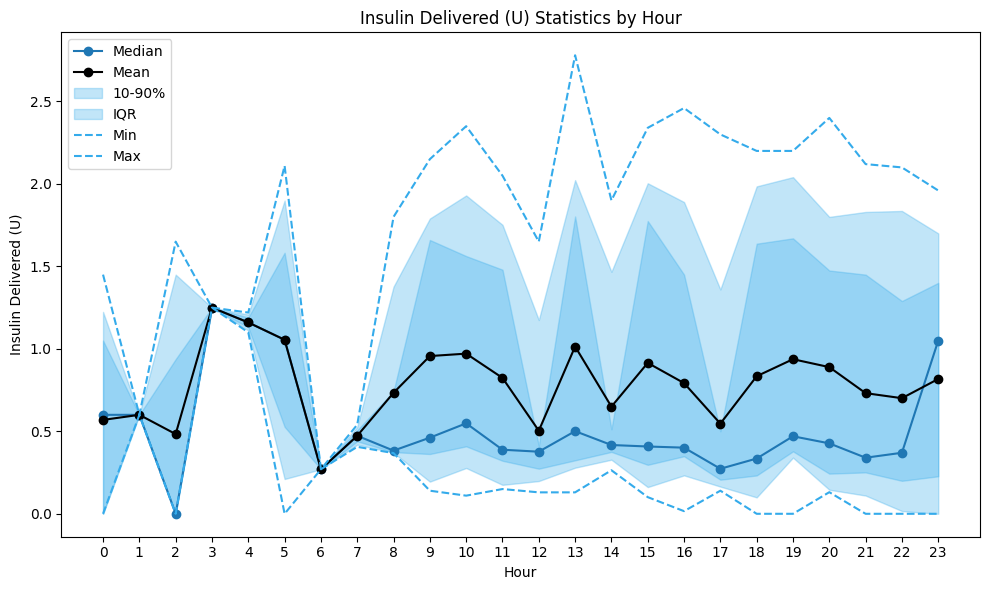

In [72]:
plt.figure(figsize=(10, 6))

# Plot each statistic
plt.plot(grouped['Hour'], grouped['median'], label='Median', marker='o')
plt.plot(grouped['Hour'], grouped['mean'], label='Mean', marker='o', c = 'black')
plt.fill_between(
    grouped["Hour"],
    grouped["tenth_quantil"],
    grouped["ninetieth_quantil"],
    alpha=0.3,
    label="10-90%",
    color="#34abeb",
)
plt.fill_between(
    grouped["Hour"],
    grouped["first_quartile"],
    grouped["third_quartile"],
    alpha=0.3,
    label="IQR",
    color="#34abeb",
)
plt.plot(grouped['Hour'], grouped['min'], label='Min', c="#34abeb", linestyle="--")
plt.plot(grouped['Hour'], grouped['max'], label='Max', c="#34abeb", linestyle="--")
#plt.plot(grouped['Hour'], grouped['first_quartile'], label='1st Quartile', marker='o')
#plt.plot(grouped['Hour'], grouped['third_quartile'], label='3rd Quartile', marker='o')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Insulin Delivered (U)')
plt.title('Insulin Delivered (U) Statistics by Hour')

# Rotate x-axis labels for better readability
plt.xticks(list(range(0, 24)))
#plt.xticklabels(list(range(0, 24)))
# plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# radsej mean